<a href="https://colab.research.google.com/github/shinmiura/diveintocode-ml/blob/master/%E3%83%AD%E3%82%B8%E3%82%B9%E3%83%86%E3%82%A3%E3%83%83%E3%82%AF%E5%9B%9E%E5%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Sprintの目的**

・スクラッチを通してロジスティック回帰を理解する

・分類問題についての基礎を学ぶ

**どのように学ぶか**

スクラッチでロジスティック回帰を実装した後、学習と検証を行なっていきます。

【ロジスティック回帰の前提】

1. 説明変数(x)は連続値 or 離散値で、目的変数(y)は離散値である。
2. 予測値()は、ベルヌーイ分布 / 二項分布(平均np、分散np(1-p))に従う。

# 2.ロジスティック回帰スクラッチ

ロジスティック回帰のクラスをスクラッチで作成していきます。NumPyなど最低限のライブラリのみを使いアルゴリズムを実装していきます。


以下に雛形を用意してあります。このScratchLogisticRegressionクラスにコードを書き加えていってください。推定関係のメソッドは線形回帰と異なり、ラベルを出力するpredictメソッドと、確率を出力するpredict_probaメソッドの2種類を作成します。

In [1]:
# 必要なライブラリの読み込み
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [41]:
# 雛形

class ScratchLogisticRegression():
    """
    ロジスティック回帰のスクラッチ実装
    Parameters
    ----------
    num_iter : int
      イテレーション数
    lr : float
      学習率
    no_bias : bool
      バイアス項を入れない場合はTrue
    verbose : bool
      学習過程を出力する場合はTrue
    Attributes
    ----------
    self.coef_ : 次の形のndarray, shape (n_features,)
      パラメータ
    self.loss : 次の形のndarray, shape (self.iter,)
      訓練データに対する損失の記録
    self.val_loss : 次の形のndarray, shape (self.iter,)
      検証データに対する損失の記録
    """
    def __init__(self, num_iter, lr, bias, verbose, lamb = 0.1):
        # ハイパーパラメータを属性として記録
        self.iter = num_iter
        self.lr = lr
        self.bias = bias
        self.verbose = verbose
        self.lamb = lamb
        # 損失を記録する配列を用意
        self.loss = np.zeros(self.iter + 1)
        self.val_loss = np.zeros(self.iter + 1)
        # θの初期化
        self.theta = np.random.rand(X.shape[1]+1)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        ロジスティック回帰を学習する。検証データが入力された場合はそれに対する損失と精度もイテレーションごとに計算する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        y : 次の形のndarray, shape (n_samples, )
            訓練データの正解値
        X_val : 次の形のndarray, shape (n_samples, n_features)
            検証データの特徴量
        y_val : 次の形のndarray, shape (n_samples, )
            検証データの正解値
        """
        # 損失の初期化
        self.loss[0] = self.mean_crossentropy_error(X, y)
        if X_val is not None:
          self.val_loss[0] = self.mean_crossentropy_error(X_val, y_val)
        
        #　反復して損失を取得
        for i in range(self.iter):
          self.loss[i + 1] = self.gradient_descent(X, y)
          if X_val is not None:
            self.val_loss[i + 1] = self.mean_crossentropy_error(X_val, y_val)
        print(self.predict_proba(X))

        if self.verbose:
            #verboseをTrueにした際は学習過程を出力
            print()
        pass
    
    # 問題2
    def gradient_descent(self, X, y):
        """
        最急降下法によるパラメータの更新値計算
        """
        error = (self.predict_proba(X) - y.flatten()) # n次元のNumpy配列yを1次元のNumpy配列に変換
        grad = np.dot(X.T, error) / X.shape[0]
        bias_grad = np.sum(error) / X.shape[0]
        l2 = self.lamb * self.theta[:-1] / X.shape[0]
        self.theta[:-1] = self.theta[:-1] -self.lr * (grad + l2)
        self.theta[-1] = self.theta[-1] -self.lr * bias_grad
        loss = self.mean_crossentropy_error(X, y)
        return loss

    # 問題3
    # 推定する仕組みを実装する
    def predict(self, X):
        """
        ロジスティック回帰を使いラベルを推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # クラスを決定するために、予測確率の値を確認し、比較する。0.5以上なら1を、未満なら0を返す。
        return np.where(self.predict_proba(X) >= 0.5, 1, 0)

    def predict_proba(self, X):
        """
        ロジスティック回帰を使い確率を推定する。
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            サンプル
        Returns
        -------
            次の形のndarray, shape (n_samples, 1)
            ロジスティック回帰による推定結果
        """
        # 線形回帰の仮定関数の実装
        a = np.dot(self.theta[:-1], X.T) + self.theta[-1]
        # シグモイド関数を通す 
        y = self.sigmoid(a)
        return y
    
    # シグモイド関数を通す
    def sigmoid(self, a):
      return 1 / (1 + np.exp(-a))
    
    # 問題4
    # ロジスティック回帰の目的関数(損失関数)を実装
    def mean_crossentropy_error(self, X, t):
        """
        損失関数
        """
        # クロスエントロピー誤差の定義、Weight decay(過学習抑制のためにの手法)、L2正則化
        y = self.predict_proba(X)
        crossentropy = -np.sum(t * np.log(y) + (1 - t) * np.log(1 - y)) / X.shape[0]
        l2_decay = np.sum(self.theta[:-1] ** 2) / (2 * X.shape[0])
        return crossentropy + l2_decay

【問題1】仮定関数

ロジスティック回帰の仮定関数のメソッドをScratchLogisticRegressionクラスに実装してください。


ロジスティック回帰の仮定関数は、線形回帰の仮定関数を シグモイド関数 に通したものです。シグモイド関数は以下の式で表されます。

$$
g(z) = \frac{1}{1+e^{−z}}
$$

線形回帰の仮定関数は次の式でした。
$$
h_\theta(x) = \theta^T \cdot x.
$$

まとめて書くと、ロジスティック回帰の仮定関数は次のようになります。
$$
h_\theta(x) = \frac{1}{1+e^{−\theta^T \cdot x}}
$$

$x$ : 特徴量ベクトル

$\theta$ : パラメータ（重み）ベクトル

【問題2】最急降下法

最急降下法により学習させる実装を行なってください。以下の式で表されるパラメータの更新式のメソッド_gradient_descentを追加し、fitメソッドから呼び出すようにしてください。

$$
\theta_j := \theta_j - \alpha \frac{\partial J(\theta)}{\partial \theta_j}\\ \frac{\partial J(\theta)}{\partial \theta_0} = \frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)}  ,j = 0\\ \frac{\partial J(\theta)}{\partial \theta_j} = \biggl(\frac{1}{m}  \sum_{i=1}^{m}(h_θ(x^{(i)}) − y^{(i)})x_j^{(i)} \biggr) + \frac{λ}{m}\theta_j　 ,j\geq 1
$$

$\alpha$ : 学習率


$i$ : サンプルのインデックス


$j$ : 特徴量のインデックス


$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解ラベル


$\theta_j$ : j番目のパラメータ（重み）


$λ$ : 正則化パラメータ

以上の式には正則化項が含まれます。正則化項は過学習を防ぐ目的で用いられます。切片である$\theta_0$が正則化項に含まれていないのは、切片を除いた、特徴量に対する係数を同じ視点で議論することができるようにするためです。

【問題3】推定

推定する仕組みを実装してください。ScratchLogisticRegressionクラスの雛形に含まれるpredictメソッドとpredict_probaメソッドに書き加えてください。


仮定関数 $h_\theta(x)$ の出力がpredict_probaの戻り値、さらにその値に閾値を設けて1と0のラベルとしたものがpredictの戻り値となります。

【問題4】目的関数

以下の数式で表されるロジスティック回帰の 目的関数（損失関数） を実装してください。そして、これをself.loss, self.val_lossに記録するようにしてください。


なお、この数式には正則化項が含まれています。


＊数式が見切れる場合、DIVERを全画面にして御覧ください。

$$
J(\theta)=  \frac{1}{m}  \sum_{i=1}^{m}[−y^{(i)} log(h_θ(x^{(i)})) − (1−y^{(i)}) log(1−h_θ(x^{(i)}))] +
\frac{λ}{2m}\sum_{j=1}^n
θ^2_j\\
$$

$m$ : 入力されるデータの数


$h_\theta()$ : 仮定関数


$x$ : 特徴量ベクトル


$\theta$ : パラメータ（重み）ベクトル


$x^{(i)}$ : i番目のサンプルの特徴量ベクトル


$y^{(i)}$ : i番目のサンプルの正解ラベル


$\theta_j$ : j番目のパラメータ（重み）


$n$ : 特徴量の数


$λ$ : 正則化パラメータ

# 3.検証

【問題5】学習と推定

機械学習スクラッチ入門のSprintで用意したirisデータセットのvirgicolorとvirginicaの2値分類に対してスクラッチ実装の学習と推定を行なってください。


scikit-learnによる実装と比べ、正しく動いているかを確認してください。


AccuracyやPrecision、Recallなどの指標値はscikit-learnを使用してください。

In [ ]:
# ヒント集に書いてあった実装の手順
# 最急降下法の流れに則ると、下記の流れで実装していくとよいでしょう。
# 1. 学習率や学習回数の初期化＆シータの初期化（`no_bias`や`verbose`については、アドバンス課題のため考慮しなくてもよい）
# 2. 推定値算出
# 3. 値更新
# 4. 2,3を学習回数文繰り返す

In [85]:
# irisデータセット読み込み
from sklearn.datasets import load_iris
iris_dataset = load_iris()

In [86]:
print(iris_dataset)
print(len(iris_dataset))

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [87]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split

X = iris_dataset.data[50:, :]
y = iris_dataset.target[50:]
y = np.where(y == 1, 0, 1)
X = np.array(X)
y = np.array(y)
y = y.reshape([100, 1])

In [88]:
# pandasデータに格納
iris_df = pd.DataFrame(X, columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width']) 
# ターゲット変数の抽出およびカラム名の指定
iris_label = pd.DataFrame(y, columns = ["Species"])
iris_df.head()

,sepal_length,sepal_width,petal_length,petal_width
0,7.0,3.2,4.7,1.4
1,6.4,3.2,4.5,1.5
2,6.9,3.1,4.9,1.5
3,5.5,2.3,4.0,1.3
4,6.5,2.8,4.6,1.5


In [89]:
# trainデータとtestデータへの分割
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [90]:
# ロジスティック回帰のスクラッチ実装をここで呼び出す
slr = ScratchLogisticRegression(num_iter=10000, lr=0.0001, bias=True, verbose=True)
slr.fit(X_train,y_train.reshape(-1,1),X_test,y_test.reshape(-1,1))

[0.4401868  0.54846854 0.42917444 0.50779725 0.40517258 0.38368202
 0.45494755 0.4749527  0.50030383 0.50344439 0.45555856 0.40396023
 0.50420951 0.56827839 0.42070604 0.50596883 0.47386334 0.42766962
 0.47495628 0.51451671 0.48800862 0.53559137 0.44730653 0.41650405
 0.48193469 0.43402148 0.49892511 0.47352527 0.42543423 0.45747655
 0.454783   0.46433386 0.5021958  0.43909873 0.4808666  0.48663675
 0.51169555 0.50010565 0.53936599 0.38298784 0.44283587 0.44051863
 0.4448879  0.43833564 0.50004955 0.49188777 0.4916097  0.52661407
 0.39293051 0.50365207 0.56207111 0.51308895 0.46311319 0.40039913
 0.40969492 0.4098335  0.51618512 0.48238889 0.45953454 0.44073283
 0.4121186  0.43904346 0.47845574 0.45063887 0.44322938 0.47977844
 0.47327651 0.50335487 0.4460509  0.45522226]



In [91]:
slr.predict(X)

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1])

In [92]:
slr.predict_proba(X)

array([0.43833564, 0.48490489, 0.44051863, 0.4448879 , 0.4401868 ,
       0.47352527, 0.50596883, 0.4749527 , 0.42766962, 0.50983544,
       0.42917444, 0.50004955, 0.38298784, 0.46433386, 0.50010565,
       0.45063887, 0.51451671, 0.43909873, 0.40396023, 0.44283587,
       0.53559137, 0.45555856, 0.42070604, 0.43904346, 0.44322938,
       0.44730653, 0.4121186 , 0.45789966, 0.4808666 , 0.44308799,
       0.44073283, 0.43402148, 0.45747655, 0.46271433, 0.52661407,
       0.53598208, 0.45494755, 0.39293051, 0.50335487, 0.46358098,
       0.46003267, 0.47495628, 0.4469123 , 0.45953454, 0.47386334,
       0.48800862, 0.48663675, 0.45522226, 0.4840057 , 0.47845574,
       0.56207111, 0.49892511, 0.454783  , 0.47327651, 0.50030383,
       0.41650405, 0.52588673, 0.40517258, 0.4098335 , 0.53484782,
       0.51169555, 0.4601833 , 0.47779332, 0.49542053, 0.54846854,
       0.53936599, 0.47182457, 0.49188777, 0.3863694 , 0.40969492,
       0.50420951, 0.53095541, 0.38368202, 0.46311319, 0.50964

In [93]:
slr.predict_proba(X_test)

array([0.46003267, 0.53598208, 0.46741351, 0.4601833 , 0.56874573,
       0.3863694 , 0.43235786, 0.45789966, 0.46358098, 0.4469123 ,
       0.46271433, 0.53484782, 0.49542053, 0.54176495, 0.52588673,
       0.48728331, 0.45116733, 0.48490489, 0.53095541, 0.48998205,
       0.50983544, 0.49892511, 0.44308799, 0.5107375 , 0.44231405,
       0.50964572, 0.47779332, 0.47182457, 0.41053931, 0.4840057 ])

In [94]:
y_pred = slr.predict(X_test)
y_pred = y_pred.reshape(y_test.shape)

In [95]:
print('正解率:{}'.format(accuracy_score(y_test, y_pred)))
print('適合率:{}'.format(precision_score(y_test, y_pred)))
print('再現率:{}'.format(recall_score(y_test, y_pred)))
print('F値:{}'.format(f1_score(y_test, y_pred)))
print(confusion_matrix(y_test, y_pred))

正解率:0.5
適合率:0.7777777777777778
再現率:0.35
F値:0.48275862068965514
[[ 8  2]
 [13  7]]


In [96]:
# scikit-learnによる実装と比べ、正しく動いているかを確認
# 必要なライブラリの読み込み
from sklearn.linear_model import LogisticRegression
# ロジスティック回帰モデルのインスタンスを作成
lr = LogisticRegression()
# ロジスティック回帰モデルの重みを学習
lr.fit(X_train, y_train)
y_pred2 = lr.predict(X_test)
y_pred2 = y_pred2.reshape(y_test.shape)

print('scikit-learnの場合の正解率:{}'.format(accuracy_score(y_test, y_pred2)))
print('scikit-learnの場合の適合率:{}'.format(precision_score(y_test, y_pred2)))
print('scikit-learnの場合の再現率:{}'.format(recall_score(y_test, y_pred2)))
print('scikit-learnの場合のF値:{}'.format(f1_score(y_test, y_pred2)))
print(confusion_matrix(y_test, y_pred2))

scikit-learnの場合の正解率:0.8666666666666667
scikit-learnの場合の適合率:0.9
scikit-learnの場合の再現率:0.9
scikit-learnの場合のF値:0.9
[[ 8  2]
 [ 2 18]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


〈問題５解答〉
以上のとおり、スクラッチ実装した結果は、scikit-learnによる実装と比べ、正しく動いていることを確認できた。

【問題6】学習曲線のプロット

学習曲線を見て損失が適切に下がっているかどうか確認してください。

In [97]:
# 問題6のヒント
# クラス内に描画関数を追加してもよいですし、インスタンス変数として損失値を保持しているので、クラス外部で描画してもよいです。

In [98]:
# 必要なライブラリのインポート
import matplotlib.pyplot as plt
%matplotlib inline

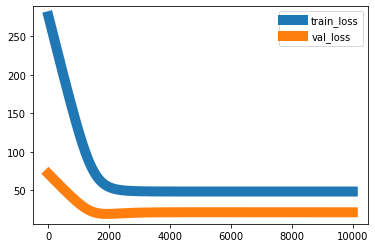

In [99]:
plt.plot(np.arange(1, len(slr.loss) + 1), slr.loss, label = 'train_loss', linewidth = 10)
plt.plot(np.arange(1, len(slr.val_loss) + 1), slr.val_loss, label = 'val_loss', linewidth = 10)
plt.legend()

〈問題6解答〉
以上のとおり、学習曲線を見ると損失が適切に下がっていることを確認できた。

【問題7】決定領域の可視化

決定領域を可視化してください。

In [ ]:
# 問題7のヒント
# 「決定領域を可視化する」とは、分類結果を分かりやすく色分けすることを言います。
# 点の描画は問題ないかと思いますが、背景色の決定境界線の描画に関しては、使用している説明変数の範囲にある全ての値の候補に対する推定結果を描画します。
# ヒントとしては、numpyのmeshgridという関数を使用し、**説明変数の範囲にある全ての値の候補** を求め、predictするイメージです。
# クラス内に描画関数を追加してもよいですし、インスタンス変数として損失値を保持しているので、クラス外部で描画してもよいです。

In [121]:
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

def decision_region(X, y, model, step = 0.01, title = 'decision region', xlabel = 'xlabel', ylabel = 'ylabel', target_names = ['setosa', 'versicolor']):
  scatter_color = ['red', 'blue']
  contourf_color = ['pink', 'skyblue']
  n_class = 2
  marker = ['o', '^']

  # numpyのmeshgridという関数を使用し、**説明変数の範囲にある全ての値の候補** を求め、predictする
  mesh_f0, mesh_f1 = np.meshgrid(np.arange(np.min(X[:, 0])-0.5, np.max(X[:, 0])+0.5, step), np.arange(np.min(X[:, 1])-0.5, np.max(X[:, 1]) + 0.5, step))
  mesh = np.c_[np.ravel(mesh_f0), np.ravel(mesh_f1)]
  y_pred = model.predict(mesh).reshape(mesh_f0.shape)

  # 描画
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.contourf(mesh_f0, mesh_f1, y_pred, n_class-1, cmap = ListedColormap(contourf_color))
  plt.contour(mesh_f0, mesh_f1, y_pred, n_class-1, colors = 'y', linewidths = 3, alpha = 0.5)
  for i, j in enumerate(set(y)):
    plt.scatter(X[y == j][:, 0], X[y == j][:, 1], s = 80, color = scatter_color[i], label = target_names[i], marker = marker[i])
  patches = [mpatches.Patch(color = scatter_color[i], label = target_names[i]) for i in range(n_class)]
  plt.legend(handles = patches)
  plt.legend()
  plt.show()

In [122]:
X = iris.data[:100, :]
y = iris.target[:100]
X = X[:, [0, 2]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state = 0)

In [123]:
slr = ScratchLogisticRegression(num_iter = 10000, lr = 1, bias = True, verbose = True)
slr.fit(X = X_train, y = y_train, X_val = X_test, y_val = y_test)

[0.99964738 0.99595982 0.00657047 0.01121292 0.00620311 0.99961117
 0.01801889 0.00299628 0.02301086 0.99984261 0.00841795 0.00841795
 0.9995969  0.95855246 0.97137607 0.9994919  0.00944176 0.99964097
 0.00188748 0.99684957 0.009999   0.01907258 0.00695944 0.99867073
 0.85259723 0.99491215 0.01941272 0.99856602 0.9998888  0.9999082
 0.01608012 0.00737126 0.9888708  0.01518919 0.009999   0.99883705
 0.99952903 0.00780726 0.99781186 0.9998653  0.99907727 0.00342388
 0.009999   0.99995991 0.01121292 0.99848067 0.99754385 0.98211474
 0.00875745 0.05206479]



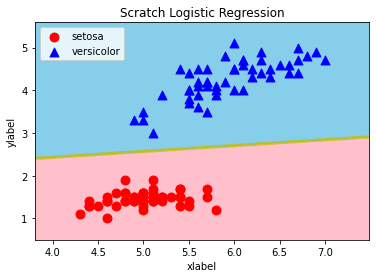

In [124]:
decision_region(X, y, slr, step = 0.01, title = 'Scratch Logistic Regression', xlabel = 'xlabel', ylabel = 'ylabel', target_names = ['setosa', 'versicolor'])

【問題8】（アドバンス課題）重みの保存

検証が容易になるように、学習した重みを保存および読み込みができるようにしましょう。pickleモジュールやNumPyのnp.savezを利用します。